CNN 알고리즘(얀르쿤) 종류
- LeNet(1,2,...,5) : LeNet5는 최종 버전
- AlexNet : dropout 처음 사용 -> 과적합을 방지하기 위한 요소
- VGG-NET : 컴퓨터 비전 하는 사람들은 대부분 안다.
    - 5개의  convolutional layers
- GoogleNet
- ResNet
- SeNet : 연산속도가 빠른 장점이 있다.
- UNet

- 면접관들 입장에서 기술적인 면접 질문으로 CNN 알고리즘 네트워크 구조에대한것 (대략적인 지식요구)
- 인용회수가 높은 유명한 논문들의 Reference를 보면 공부가 많이 된다.

Keras 책
- 177 쪽 스트라이드 용어에 대한 계산수식이 안나와 있어서 수식은 이렇다
- 입력이미지 크기 : Height * Width
- zero padding : p 만큼 한다고 했을때
- 필터 크기 : Fh * Fw
- 스트라이드 : S

피처맵 높이 = $$(H+2P-Fh)\over S+1$$  
피처맵 너비 = $$(W+2P-Fw)\over S+1$$

https://excelsior-cjh.tistory.com/79

LeNet, ResNet, VGG-Net 을 시도해보자 (랜드마크) -> 포트폴리오에 추가

비를 예측하는 모델에게 전이학습을 통해서 눈을 예측하도록 해볼 수 있다.  
[아프리카 빈곤지도](http://sustain.stanford.edu/predicting-poverty)  
- 인공위성 지도와 딥러닝 학습을 통해서 만들 수 있었다.
- 도로, 수로, 농지 등~ 빈곤과 연계할수 있는 사진들과, 야간의 조명 등등을 파악해서 만들 수 있었다.
- 빈곤을 돕는 기관들에게 정보를 제공해서 서비스를 제공

In [1]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553467904/553467096 [==============================] - 75s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [3]:
#google-net
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# summarize the model
model.summary()

96116736/96112376 [==============================] - 47s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________________

In [4]:
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()

102973440/102967424 [==============================] - 12s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [7]:
image= load_img("dog.jpg", target_size=(224,224))

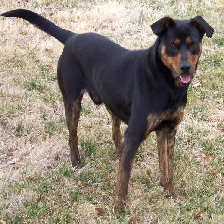

In [8]:
image

In [9]:
img_to_array(image).shape

(224, 224, 3)

In [11]:
image=img_to_array(image)

In [12]:
image=image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [14]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [15]:
image=preprocess_input(image)

In [16]:
model=VGG16()

In [17]:
model.predict(image)

array([[1.58425635e-07, 9.59210809e-08, 2.92968963e-07, 2.61295156e-07,
        9.29775752e-07, 3.23137755e-07, 2.23585417e-07, 7.59211571e-06,
        5.90796571e-06, 7.65273001e-07, 1.01574841e-07, 1.54232808e-07,
        1.71591140e-07, 1.90989397e-07, 8.10667075e-07, 3.35485151e-06,
        1.21172604e-07, 1.52512359e-06, 8.12286089e-07, 9.16730230e-08,
        1.08039679e-07, 3.25902704e-07, 5.03717729e-07, 1.24394126e-06,
        3.96022017e-07, 2.03032323e-06, 2.09065729e-06, 2.32803654e-06,
        2.58807313e-06, 6.84837858e-07, 1.49544178e-07, 4.34136155e-07,
        3.00006064e-07, 2.19182695e-07, 2.22246115e-07, 2.60144446e-07,
        3.10443966e-07, 2.05501419e-06, 4.22173969e-07, 3.35206749e-07,
        6.96316022e-07, 5.06461390e-07, 4.62891990e-07, 2.14501824e-07,
        8.03492867e-07, 2.06647073e-07, 7.51228924e-07, 3.40762540e-07,
        2.37260963e-07, 3.82144407e-07, 9.65788217e-07, 3.82736346e-07,
        2.97793235e-07, 8.81798826e-07, 9.19506363e-07, 3.251774

In [18]:
model.predict(image).shape

(1, 1000)

In [19]:
yhat=model.predict(image)

In [20]:
decode_predictions(yhat)

40960/35363 [==================================] - 0s 2us/step


[[('n02107142', 'Doberman', 0.335948),
  ('n02105412', 'kelpie', 0.21615948),
  ('n02106550', 'Rottweiler', 0.17698725),
  ('n02089078', 'black-and-tan_coonhound', 0.12776807),
  ('n02107312', 'miniature_pinscher', 0.037303567)]]

In [21]:
import numpy as np
np.shape(decode_predictions(yhat))

(1, 5, 3)

In [24]:
decode_predictions(yhat)[0][0][1]

'Doberman'

In [25]:
decode_predictions(yhat)[0][0][2] #33%

0.335948

1. 필기체 인식
2. x-ray 사진 -> 질병 예측
3. 침입탐지
4. 진위여부?
5. 그림 완성 (틀 그리면 색상 덧칠 -> 그림 완성)
    - 동그란 원 -> 빨간 사과를 그림
    - 원, 짝대기 -> 태극기 완성
6. GAN 응용 -> 피카소 화풍으로 그림그리기, 오바마/트럼프 흉내 (deep fake) 이정도 난이도는 파이널 프로젝트